In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Dataset.csv")
df.head()

,C1,C2,C3,C4,C5,C6,C7
0,P1,0.394667,0.0000,0.000000,0.00000,NaN,N
1,P1,0.387915,0.0000,-1.710853,0.00000,NaN,N
2,P1,0.361299,0.0104,-6.861376,0.00000,1.0,S
3,P1,0.488484,0.0104,35.202105,0.00000,1.0,S
4,P1,0.398206,0.0000,-18.481272,8.04056,NaN,N


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
C2,22007.0,0.417560,0.253368,0.135146,0.263494,0.303054,0.506786,1.641544
C3,22007.0,0.012262,0.085103,0.000000,0.000000,0.000000,0.000000,1.336000
C4,22007.0,0.613107,11.374086,-85.450203,-3.429123,-0.136920,3.121814,344.552351
C5,22007.0,2.494014,5.584665,0.000000,0.486256,1.208030,2.745452,146.158245
C6,901.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 1-	Do the null value imputation if Column 'C6' is binary and has mean value of 0.040941.

There are mainly 5 methods of imputing null values:

- Delete the observations.
- Replace missing values with the most frequent value.
- Develop a model to predict missing values.
- Deleting the variable.
- Apply unsupervised Machine learning techniques.

In [4]:
df.isna().sum()

C1        0
C2        0
C3        0
C4        0
C5        0
C6    21106
C7        0
dtype: int64

In [5]:
df['C6'].unique()

array([nan,  1.])

**Note:** Since, mean of column 'C6' was very small in comparison to 0.5, therefore, we are replacing null values with 0.

In [6]:
df = df.fillna(0)

df.isna().sum()

C1    0
C2    0
C3    0
C4    0
C5    0
C6    0
C7    0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
C2,22007.0,0.417560,0.253368,0.135146,0.263494,0.303054,0.506786,1.641544
C3,22007.0,0.012262,0.085103,0.000000,0.000000,0.000000,0.000000,1.336000
C4,22007.0,0.613107,11.374086,-85.450203,-3.429123,-0.136920,3.121814,344.552351
C5,22007.0,2.494014,5.584665,0.000000,0.486256,1.208030,2.745452,146.158245
C6,22007.0,0.040942,0.198159,0.000000,0.000000,0.000000,0.000000,1.000000


### 2- Calculate the percentage of each level of column 'C7'.

In [8]:
df.groupby('C7').count().drop(['C2', 'C4', 'C3', 'C5', 'C6'], axis='columns') / len(df) * 100

,C1
C7,
I,0.922434
N,95.905848
S,3.171718


- Occurence of I (in percentage): 0.9224
- Occurence of N (in percentage): 95.9058
- Occurence of S (in percentage): 3.1717

### 3- Plot the mean and range of column 'C5' w.r.t each level of the target column.

Mean.

In [9]:
me = df.groupby('C7').mean().drop(['C2', 'C4', 'C3', 'C6'], axis='columns')
me

,C5
C7,
I,14.576912
N,2.249930
S,6.360506


Range = Min to Max

In [10]:
mi = df.groupby('C7').min().drop(['C1', 'C2', 'C4', 'C3', 'C6'], axis='columns')
mi

,C5
C7,
I,0.0
N,0.0
S,0.0


In [11]:
ma = df.groupby('C7').max().drop(['C1', 'C2', 'C4', 'C3', 'C6'], axis='columns')
ma

,C5
C7,
I,146.158245
N,127.264707
S,99.628943


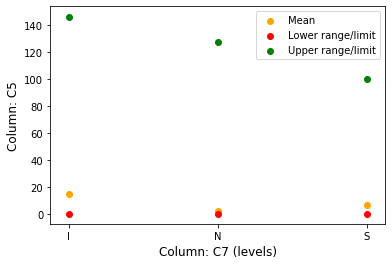

In [12]:
level_C7 = ['I', 'N', 'S']

import matplotlib.pyplot as plt

me = plt.scatter(level_C7, me['C5'], color='orange')
mi = plt.scatter(level_C7, mi['C5'], color='red')
ma = plt.scatter(level_C7, ma['C5'], color='green')

plt.ylabel('Column: C5', size=12)
plt.xlabel('Column: C7 (levels)', size=12)
plt.legend((me, mi, ma), ('Mean', 'Lower range/limit', 'Upper range/limit'))
plt.show()

### 4- Find the count of persons having 'C3' & 'C6' = 0 in common.

In [13]:
X = df.loc[(df['C3'] == 0) & (df['C6'] == 0)]
X.groupby('C1').count().drop(['C2', 'C4', 'C5', 'C7'], axis='columns')

,C3,C6
C1,,
P1,647,647
P10,196,196
P11,598,598
P12,238,238
P13,1066,1066
P14,144,144
P15,243,243
P16,426,426
P17,534,534


In [14]:
print("Count of persons having 'C3' & 'C6' = 0:", len(X))

Count of persons having 'C3' & 'C6' = 0: 21106


In [15]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df['C1'] = labelencoder.fit_transform(y=df['C1'])
df['C7'] = labelencoder.fit_transform(y=df['C7'])
df.head()

,C1,C2,C3,C4,C5,C6,C7
0,0,0.394667,0.0000,0.000000,0.00000,0.0,1
1,0,0.387915,0.0000,-1.710853,0.00000,0.0,1
2,0,0.361299,0.0104,-6.861376,0.00000,1.0,2
3,0,0.488484,0.0104,35.202105,0.00000,1.0,2
4,0,0.398206,0.0000,-18.481272,8.04056,0.0,1


**I = 0, N = 1 and S = 2**

### 6- Create a data frame using ‘group by’ function showing counts of each level of target column and mean values of column ‘C4’.

In [16]:
count_C4 = df.groupby('C7').count().drop(['C1', 'C2', 'C3', 'C5', 'C6'], axis='columns')
count_C4

,C4
C7,
0,203
1,21106
2,698


In [17]:
mean_C4 = df.groupby('C7').mean().drop(['C1', 'C2', 'C3', 'C5', 'C6'], axis='columns')
mean_C4

,C4
C7,
0,17.512347
1,0.194087
2,8.368522


The required DataFrame is below.

In [18]:
df_C4 = pd.DataFrame()
df_C4['Count'] = count_C4['C4']
df_C4['Mean'] = mean_C4['C4']

df_C4

,Count,Mean
C7,,
0,203,17.512347
1,21106,0.194087
2,698,8.368522


**I = 0, N = 1 and S = 2**

### 7- Find the person code that got highest number of entries in the dataset.

In [19]:
df_1 = pd.read_csv("Dataset.csv")
df_1 = df_1.fillna(0)

df_C1 = df_1.groupby('C1').count().drop(['C2', 'C3', 'C5', 'C6', 'C7'], axis='columns').sort_values('C4',ascending=False)
df_C1.columns = ['Count']
df_C1.head(10)

,Count
C1,
P6,2217
P20,1620
P38,1392
P26,1269
P33,1195
P27,1155
P13,1083
P28,989
P39,972


**Answer:** Person Code - 'P6' has the highest number of entries.

### 8- Find the person code that got highest percentage of level 'I' w.r.t others.

In [20]:
I = df_1.loc[(df_1['C7'] == 'I')]

df_C1_I = I.groupby(['C1']).count().drop(['C2', 'C3', 'C5', 'C6', 'C7'], axis='columns').sort_values('C4',ascending=False) / len(I) * 100
df_C1_I.columns = ['Percentage']

df_C1_I.head(8)

,Percentage
C1,
P3,18.226601
P2,5.418719
P4,4.926108
P12,4.433498
P23,3.940887
P24,3.448276
P1,2.955665
P25,2.955665


**Answer:** Person Code - 'P3' has the highest percentage of 18.2266% of 'I' wrt to other person codes.

### 12.	Choose any algorithm of your choice and perform classification task for the dataset given.
- Print the confusion matrix.
- Calculate the F1 score and Recall. (Scores of 0.75+ will be appreciated).


In [21]:
df.head()

,C1,C2,C3,C4,C5,C6,C7
0,0,0.394667,0.0000,0.000000,0.00000,0.0,1
1,0,0.387915,0.0000,-1.710853,0.00000,0.0,1
2,0,0.361299,0.0104,-6.861376,0.00000,1.0,2
3,0,0.488484,0.0104,35.202105,0.00000,1.0,2
4,0,0.398206,0.0000,-18.481272,8.04056,0.0,1


Using **XGBClassifier**

In [22]:
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBClassifier

Y = df['C7']
X = df[['C1', 'C2', 'C3', 'C4', 'C5', 'C6']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

clf = XGBClassifier()
clf.fit(X_train, Y_train)

[20:41:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score

def model_result(clf, x_test, y_test):
    y_prob=clf.predict_proba(x_test)
    y_pred=clf.predict(x_test)
    print('F1 core :',(f1_score(y_test, y_pred, pos_label='positive', average='micro')))
    print('\nRecall score :',(recall_score(y_test, y_pred, pos_label='positive', average='micro')))
    print('\nConfusion_matrix : ')
    print(confusion_matrix(y_test,y_pred))

In [24]:
model_result(clf, X_test, Y_test)

F1 core : 0.9936392548841436

Recall score : 0.9936392548841436

Confusion_matrix : 
[[  31    0   23]
 [   0 4200    0]
 [   5    0  143]]


### 5- Which two levels of target column are overlapping in nature according to given independent features. Show the overlap on a plot to support your answer.

In [25]:
I = df.loc[(df['C7'] == 0)]
N = df.loc[(df['C7'] == 1)]
S = df.loc[(df['C7'] == 2)]

print("Occurence of I:", len(I))
print("Occurence of N:", len(N))
print("Occurence of S:", len(S))

Occurence of I: 203
Occurence of N: 21106
Occurence of S: 698


In [26]:
importance = clf.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
print('\n',X.columns)

Feature: 0, Score: 0.04329
Feature: 1, Score: 0.03911
Feature: 2, Score: 0.85692
Feature: 3, Score: 0.02706
Feature: 4, Score: 0.03362
Feature: 5, Score: 0.00000

 Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6'], dtype='object')


Since, columns 'C3' and 'C1' have the highest feature importance with the target column 'C7', therefore, we will use them to plot/show the overlap of levels.

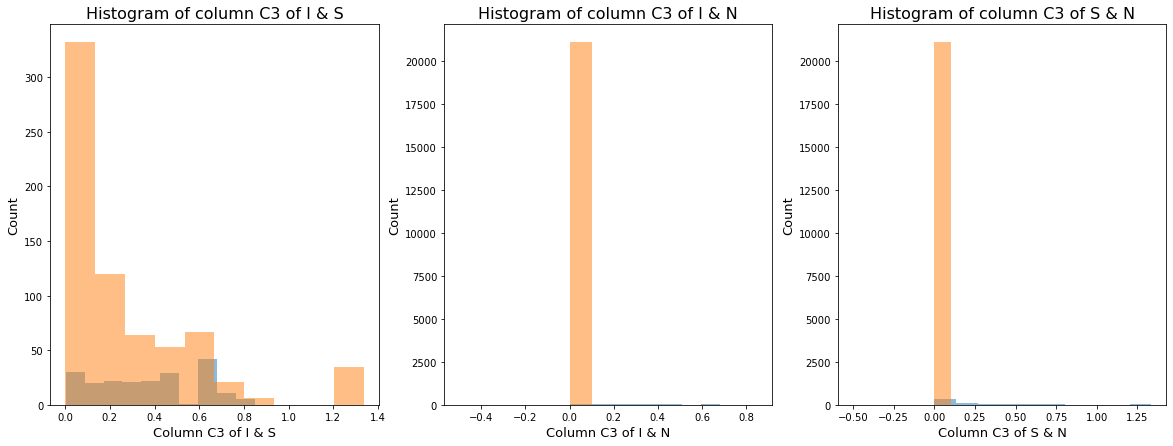

In [27]:
fig, ax_arr =plt.subplots(1,3, figsize=(20,7))
ax_arr[0].hist(I['C3'], bins=10, alpha=0.5, label="I: C3")
ax_arr[0].hist(S['C3'], bins=10, alpha=0.5, label="S: C3")
ax_arr[0].set_title('Histogram of column C3 of I & S', size=16)
ax_arr[0].set_xlabel('Column C3 of I & S', size=13)
ax_arr[0].set_ylabel('Count', size=13)

ax_arr[1].hist(I['C3'], bins=10, alpha=0.5, label="I: C3")
ax_arr[1].hist(N['C3'], bins=10, alpha=0.5, label="N: C3")
ax_arr[1].set_title('Histogram of column C3 of I & N', size=16)
ax_arr[1].set_xlabel('Column C3 of I & N', size=13)
ax_arr[1].set_ylabel('Count', size=13)

ax_arr[2].hist(S['C3'], bins=10, alpha=0.5, label="S: C3")
ax_arr[2].hist(N['C3'], bins=10, alpha=0.5, label="N: C3")
ax_arr[2].set_title('Histogram of column C3 of S & N', size=16)
ax_arr[2].set_xlabel('Column C3 of S & N', size=13)
ax_arr[2].set_ylabel('Count', size=13)

fig.show()

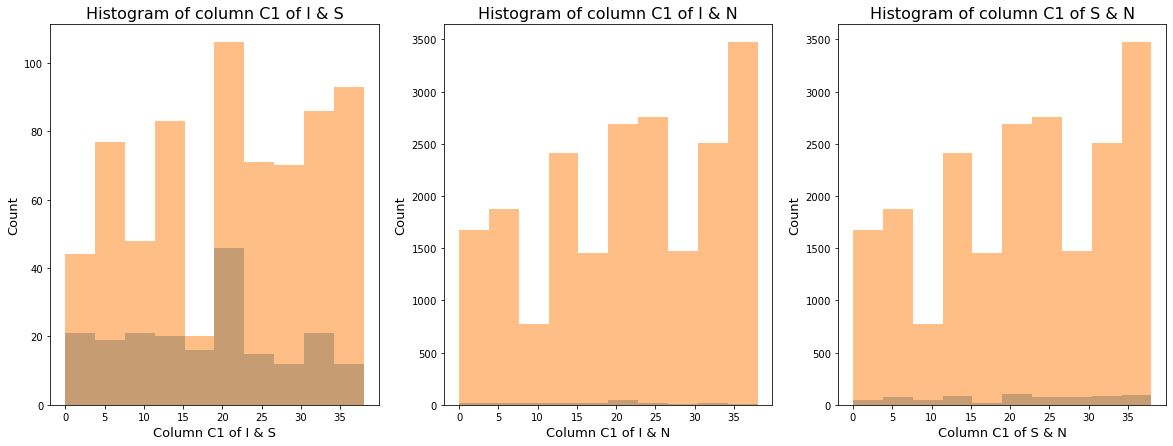

In [28]:
fig, ax_arr =plt.subplots(1,3, figsize=(20,7))
ax_arr[0].hist(I['C1'], bins=10, alpha=0.5, label="I: C1")
ax_arr[0].hist(S['C1'], bins=10, alpha=0.5, label="S: C1")
ax_arr[0].set_title('Histogram of column C1 of I & S', size=16)
ax_arr[0].set_xlabel('Column C1 of I & S', size=13)
ax_arr[0].set_ylabel('Count', size=13)

ax_arr[1].hist(I['C1'], bins=10, alpha=0.5, label="I: C1")
ax_arr[1].hist(N['C1'], bins=10, alpha=0.5, label="N: C1")
ax_arr[1].set_title('Histogram of column C1 of I & N', size=16)
ax_arr[1].set_xlabel('Column C1 of I & N', size=13)
ax_arr[1].set_ylabel('Count', size=13)

ax_arr[2].hist(S['C1'], bins=10, alpha=0.5, label="S: C1")
ax_arr[2].hist(N['C1'], bins=10, alpha=0.5, label="N: C1")
ax_arr[2].set_title('Histogram of column C1 of S & N', size=16)
ax_arr[2].set_xlabel('Column C1 of S & N', size=13)
ax_arr[2].set_ylabel('Count', size=13)

fig.show()

**Conclusion:** Levels 'I' and 'S' are overlapping the most.

### 9- Out of the independent features among C2 to C6, arrange these features in ascending or descending order of importance depending upon any feature selection method you wish to apply. Write the code and explain.

In [29]:
importance = clf.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
print('\n', X.columns)

Feature: 0, Score: 0.04329
Feature: 1, Score: 0.03911
Feature: 2, Score: 0.85692
Feature: 3, Score: 0.02706
Feature: 4, Score: 0.03362
Feature: 5, Score: 0.00000

 Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6'], dtype='object')


Feature importance in descending order.

In [30]:
imp = pd.DataFrame()

imp['Feature'] = X.columns
imp['Importance'] = importance

imp.sort_values('Importance',ascending=False).reset_index(drop=True)

,Feature,Importance
0,C3,0.856919
1,C1,0.043295
2,C2,0.039105
3,C5,0.033623
4,C4,0.027059
5,C6,0.000000


### 10- Consider the following four scatter plots(in the doc file) of two variables A and B.


**Question (a).** Out of the four plots, which has least correlation coefficient?

**Answer.** Plot 4.

**Question (b).** Which of the plots above has very a low correlation coefficient but has some relation between the variables?

**Answer.** Plot 3 has r(correlation coefficient) value very close to zero(we can see in the scatter plot).

**Question (c).** Which of the plots above has a negative correlation?

**Answer.** Plot 4.

### 11- Consider column 'C2' as a time-series column. 
Null Hypothesis (H0): This is not stationary.

Alternate Hypothesis (H1): This is stationary.

Perform any stationary test which can show that column 'C2' is stationary or not.

**Definition:** According to the Engineering Statistics Handbook of the NIST, a stationary process has the property that the mean, variance, and autocorrelation structure do not change over time.

Using **Augmented Dickey Fuller (ADF) Test.**

In [31]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['C2'], autolag='AIC')

print(f'p-value: {result[1]}')

p-value: 1.9339364386943693e-11


**Answer:**

The obtained p-value is smaller than significance level of 0.05.

Therefore, we will reject the null hypothesis.

So, the time series is stationary.